In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

RGB to Grayscale
<br>Grayscale images save space and simplify processing, making them a popular choice for computer vision tasks like object detection (in Python with OpenCV).

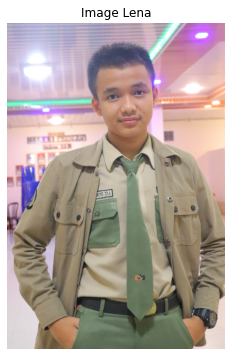

In [10]:
# read the image using OpenCV

img = cv2.imread("foto.jpg")

# convert the color from BGR to RGB for displaying using matplotlib
lena_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(lena_img)
plt.title('Image Lena')
plt.axis('off')
plt.show()

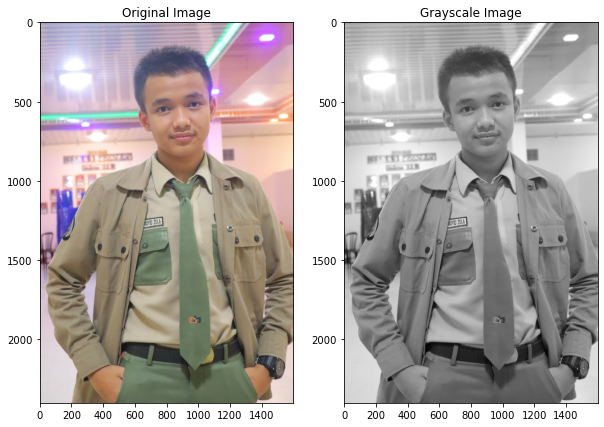

In [11]:
# Converting the lena image to grayscale
gray_img = cv2.cvtColor(lena_img, cv2.COLOR_RGB2GRAY)

# Displaying and comparing the results
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(lena_img)
axs[0].set_title('Original Image')
axs[1].imshow(gray_img, cmap='gray')
axs[1].set_title('Grayscale Image')
plt.show()

Scaling, re-sizing and interpolations


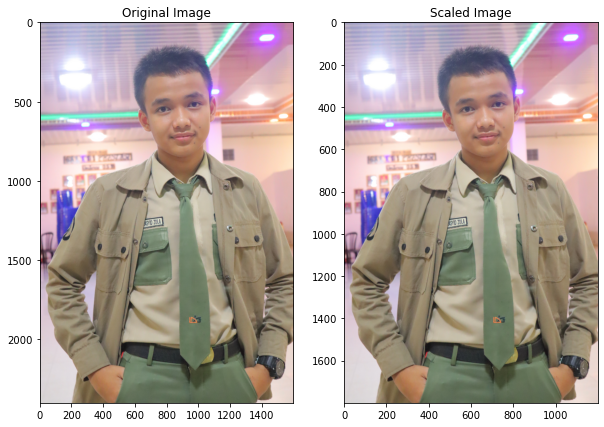

In [8]:
# Let's Use Fruits image
fruits_img = cv2.imread("foto.jpg")
fruits_img = cv2.cvtColor(fruits_img, cv2.COLOR_BGR2RGB)

# Resize image 75% of the original size
img_scaled = cv2.resize(fruits_img, None, fx=0.75, fy=0.75)

# Visualize original vs scaled image
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(fruits_img)
axs[0].set_title('Original Image')
axs[1].imshow(img_scaled)
axs[1].set_title('Scaled Image')

plt.show()

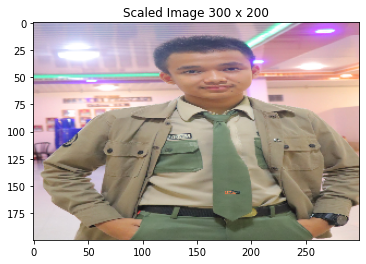

In [9]:
# Scale image to specific pixel (300x200)
img_scaled_static = cv2.resize(fruits_img, (300, 200))

# Show image
plt.imshow(img_scaled_static)
plt.title('Scaled Image 300 x 200')
plt.show()

Image Masking
<br>In computer vision, image masking lets you focus on specific areas (ROI) by creating a separate image that isolates them for further processing.

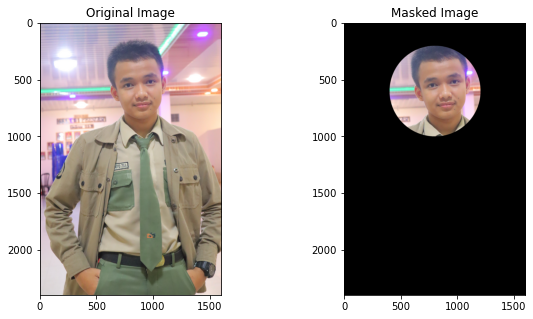

In [23]:
# We are still using lena image
img = cv2.imread("foto.jpg")
# Create a black mask with the same size as the image
mask = np.zeros(img.shape[:2], dtype=np.uint8)

# Define the center and radius of the circle
height, width = img.shape[:2]
center = (width // 2, height // 4)
radius = min(height, width) // 4

# Draw a white circle in the mask
cv2.circle(mask, center, radius, (255, 255, 255), -1)

# Apply the mask to the image
masked_img = cv2.bitwise_and(img, img, mask=mask)

# Display the original image with the circular mask
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Masked Image')
plt.show()

Color Histogram
<br>An image color histogram, created using OpenCV, is a graph that reveals the color distribution (how often each color appears) in an image, useful for tasks like segmentation and object recognition.

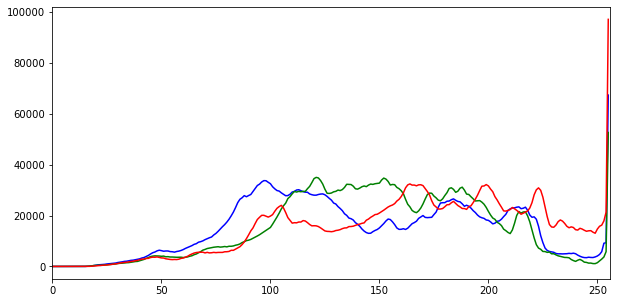

In [24]:
# Get the Lena Image
img = cv2.imread("foto.jpg")

# Plotting the histogram of a color image
color = ('b', 'g', 'r')
plt.figure(figsize=(10, 5))
for i, col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.show()

Sharpening
<br>By altering our kernels we can implement sharpening, which has the effects of in strengthening or emphasizing edges in an image.

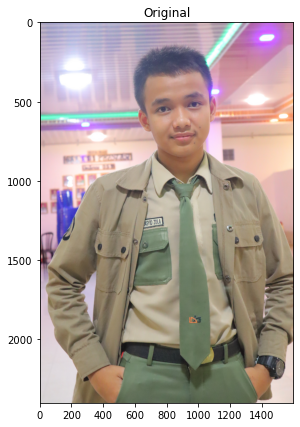

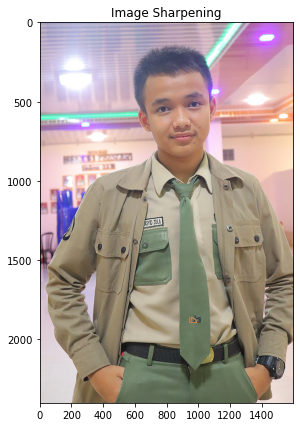

In [26]:
# We are using data building
image = cv2.imread('foto.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Create our shapening kernel, we don't normalize since the
# the values in the matrix sum to 1
kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])

# applying different kernels to the input image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 2)
plt.title("Image Sharpening")
plt.imshow(sharpened)

plt.show()

Blurring
<br>Image blurring in OpenCV (averaging, Gaussian, median) reduces noise, smooths edges, or hides details by replacing pixels with a weighted average of their neighbors.

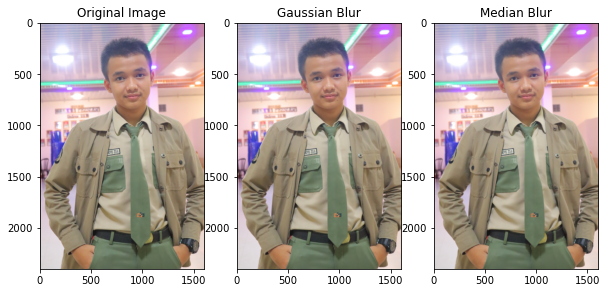

<Figure size 2160x2160 with 0 Axes>

In [33]:
# Get the lena image
img = cv2.imread("foto.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Create figure for display images for comparison multiple blurring techniques
fig, ax = plt.subplots(1, 3, figsize=(10, 10))

# Original Image
ax[0].imshow(img)
ax[0].set_title('Original Image')

# Apply gaussian blur
blur = cv2.GaussianBlur(img, (5, 5), 0)
ax[1].imshow(blur)
ax[1].set_title('Gaussian Blur')

# Apply median blur
median = cv2.medianBlur(img, 7)
ax[2].imshow(median)
ax[2].set_title('Median Blur')

# Visualize 
plt.figure(figsize=(30, 30))
plt.show()

Thresholding Image
<br>OpenCV offers various image thresholding techniques (Simple, Adaptive, Otsu's) that convert grayscale or color images to black and white (binary) to highlight key features like edges and shapes, useful for object detection, segmentation, and recognition.

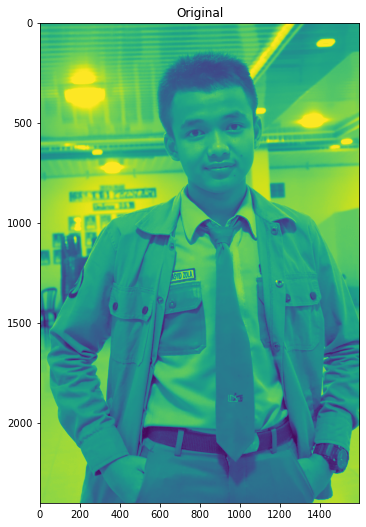

In [32]:
# Load our building image
image = cv2.imread('foto.jpg',cv2.IMREAD_GRAYSCALE)

# Plot the image
plt.figure(figsize=(30, 30))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

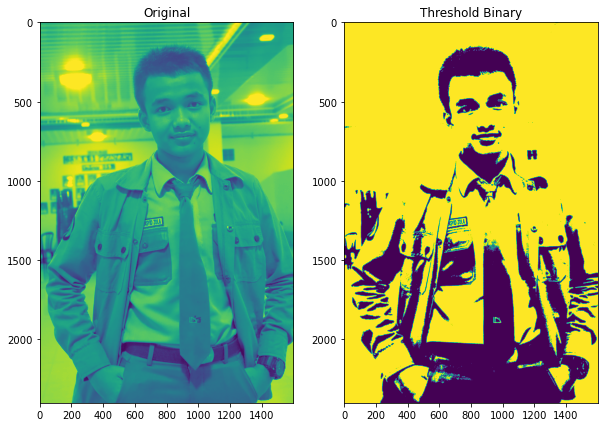

In [34]:
# Threshold Binary

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Plot original vs threshold binary image
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(image)
axs[0].set_title('Original')
axs[1].imshow(thresh1)
axs[1].set_title('Threshold Binary')
plt.show()

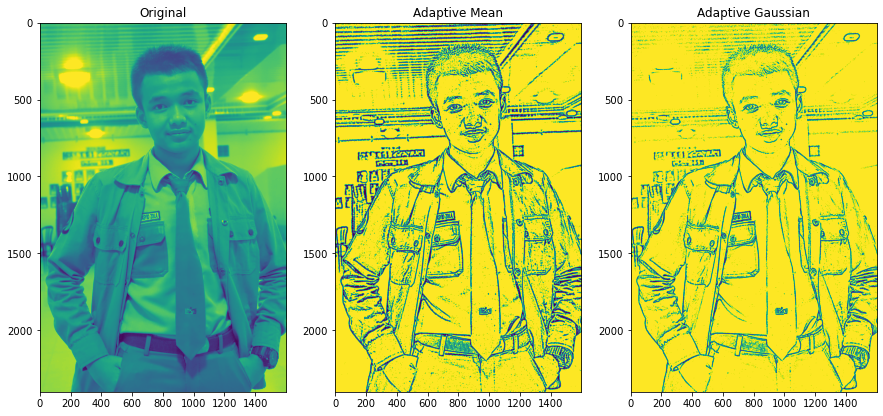

In [35]:
# It's good practice to blur images as it removes noise
blurred_image = cv2.medianBlur(image,5)

# Adaptive Threshold Mean
thresh2 = cv2.adaptiveThreshold(blurred_image,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
 cv2.THRESH_BINARY,11,2)

# Adaptive Threshold Gaussian
thresh3 = cv2.adaptiveThreshold(blurred_image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
 cv2.THRESH_BINARY,11,2)

# Plot original vs Adaptive Threshold ( Mean & Gaussian )
fig, axs = plt.subplots(1, 3, figsize=(15, 10))
axs[0].imshow(image)
axs[0].set_title('Original')
axs[1].imshow(thresh2)
axs[1].set_title('Adaptive Mean')
axs[2].imshow(thresh3)
axs[2].set_title('Adaptive Gaussian')
plt.show()


Morphological Operations
<br>OpenCV's image morphological operations (erosion, dilation, etc.) analyze image shapes by shrinking or expanding objects and are used for noise reduction, enhancement, and object recognition in computer vision.

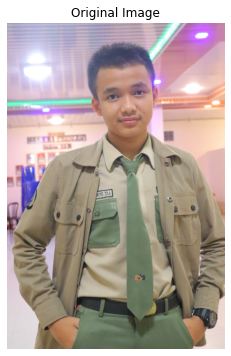

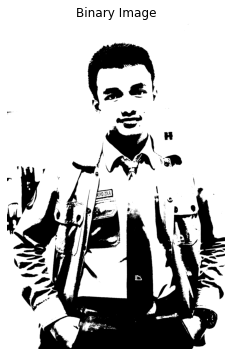

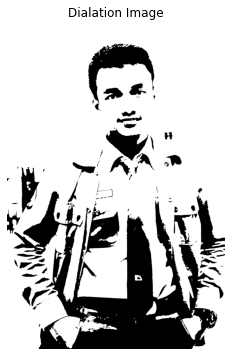

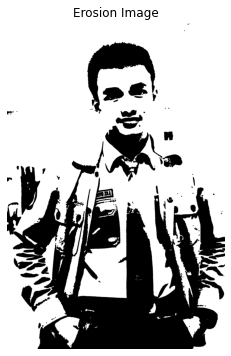

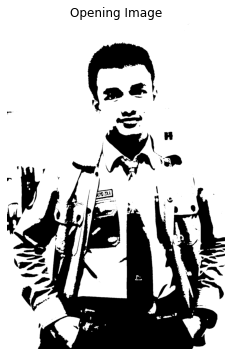

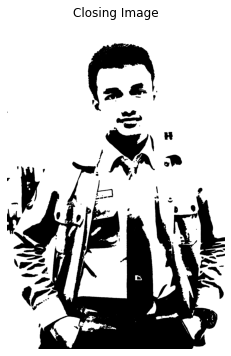

In [36]:
img = cv2.imread('foto.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to obtain a binary image
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
kernel = np.ones((5,5), np.uint8)

# Apply dilation to the binary image
dilation = cv2.dilate(binary, kernel, iterations=1)

# Apply erosion to the binary image
erosion = cv2.erode(binary, kernel, iterations=1)

# Apply opening to the binary image
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

# Apply closing to the binary image
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Display the original image and processed images using matplotlib
fig = plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(6, 6))
plt.imshow(binary, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(6, 6))
plt.imshow(dilation, cmap='gray')
plt.title('Dialation Image')
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(6, 6))
plt.imshow(erosion, cmap='gray')
plt.title('Erosion Image')
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(6, 6))
plt.imshow(opening, cmap='gray')
plt.title('Opening Image')
plt.axis('off')
plt.show()

fig = plt.figure(figsize=(6, 6))
plt.imshow(closing, cmap='gray')
plt.title('Closing Image')
plt.axis('off')
plt.show()

OpenCV Advance - Phase 2

Edge Detection
<br>OpenCV offers various image edge detection techniques like Canny, Sobel, and Laplacian filters. These methods identify sudden changes in pixel intensity, revealing the boundaries of objects within an image. This information is crucial for computer vision tasks such as object recognition, segmentation, and tracking

2400 1600


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
d:\Anaconda\lib\site-packages\matplotlib\cm.py:440: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


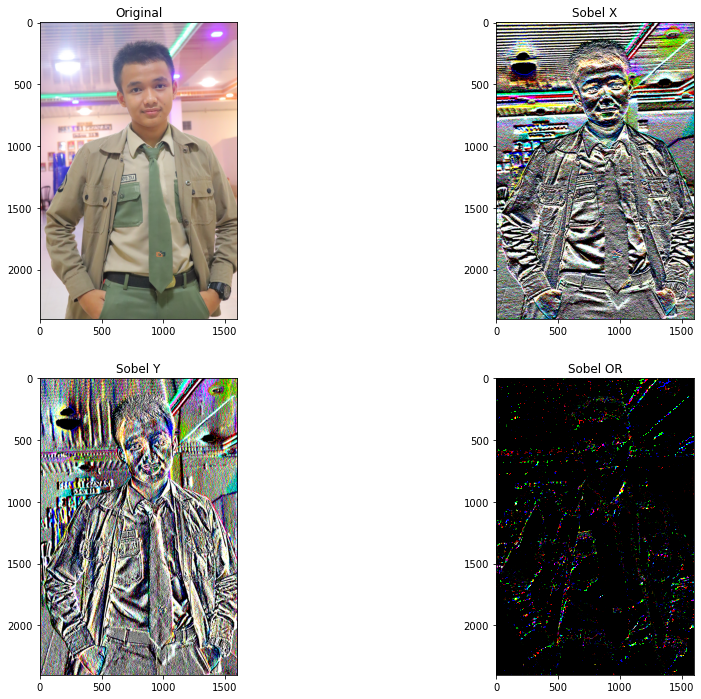

In [37]:
fruits_img2 = cv2.imread("foto.jpg")
fruits_img2 = cv2.cvtColor(fruits_img2, cv2.COLOR_BGR2RGB)

height, width,_ = fruits_img2.shape
print(height,width)

# Get Sobel Edges
sobel_x = cv2.Sobel(fruits_img2, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(fruits_img2, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(figsize=(15, 12))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(fruits_img2)

plt.subplot(2, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x)

plt.subplot(2, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)

plt.subplot(2, 2, 4)
plt.title("Sobel OR")
plt.imshow(sobel_OR)

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


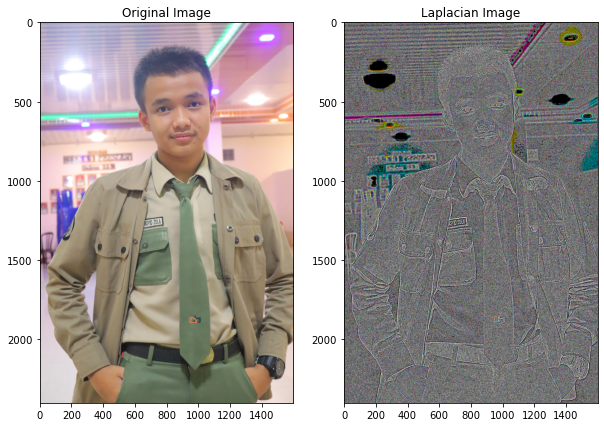

In [38]:
# Laplacian
laplacian = cv2.Laplacian(fruits_img2, cv2.CV_64F)

# Compare with original image
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(fruits_img2)
axs[0].set_title('Original Image')
axs[1].imshow(laplacian)
axs[1].set_title('Laplacian Image')
plt.show()

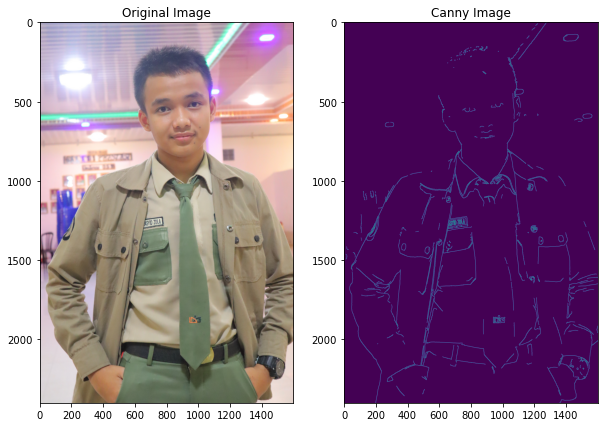

In [39]:
# Canny Edge Detection uses gradient values as thresholds
canny = cv2.Canny(fruits_img2, 100, 200)

# Compare with original image
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(fruits_img2)
axs[0].set_title('Original Image')
axs[1].imshow(canny)
axs[1].set_title('Canny Image')
plt.show()

Line Detection
<br>In OpenCV, line detection focuses on identifying and extracting straight lines within an image. This is achieved by processing the image to highlight edges (often using techniques like Canny edge detection) and then applying algorithms like Hough Line Transform that search for patterns consistent with lines. These detected lines can be crucial for various computer vision applications, such as analyzing road markings in self-driving car systems, recognizing architectural elements in images, or interpreting geometric shapes in industrial automation.

<br>cv2.HoughLines(binarized/thresholded image, 𝜌 accuracy, 𝜃 accuracy, threshold)

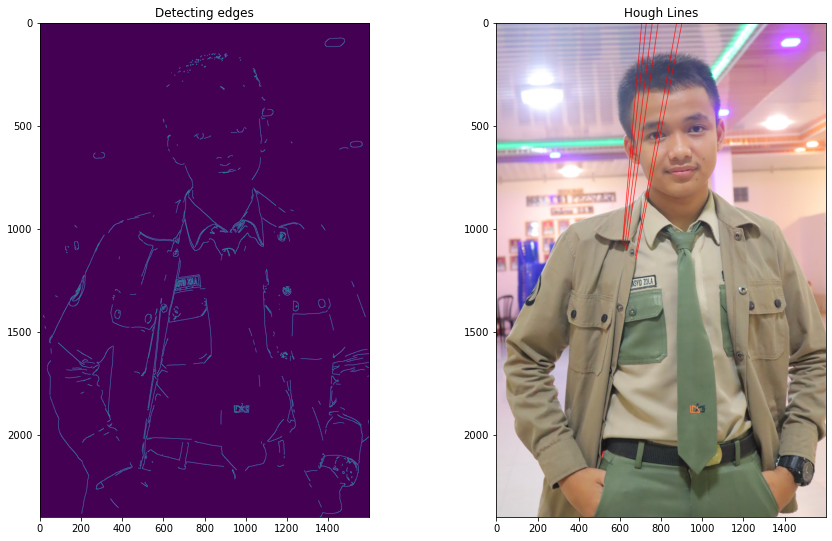

In [41]:
sudoku_img = cv2.imread('foto.jpg')
sudoku_img = cv2.cvtColor(sudoku_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(15, 20))

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(sudoku_img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

plt.subplot(2, 2, 1)
plt.title("Detecting edges")
plt.imshow(edges)

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 240 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# We iterate through each line and convert it to the format
# required by cv.lines (i.e. requiring end points)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(sudoku_img, (x1, y1), (x2, y2), (255, 0, 0), 2)


plt.subplot(2, 2, 2)
plt.title("Hough Lines")
plt.imshow(sudoku_img)

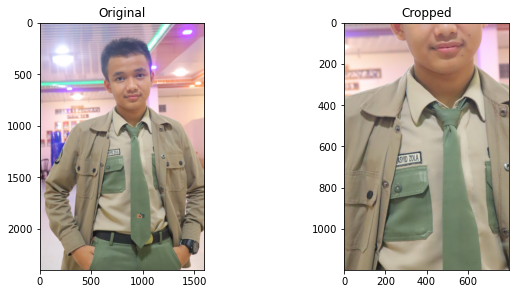

In [42]:
messi_image = cv2.imread('foto.jpg')
messi_image = cv2.cvtColor(messi_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(messi_image)

height, width = messi_image.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
start_row, start_col = int(height * .25), int(width * .25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = messi_image[start_row:end_row , start_col:end_col]


plt.subplot(2, 2, 2)
plt.title("Cropped")
plt.imshow(cropped)

Morphological Operations
<br>OpenCV's image morphological operations (erosion, dilation, etc.) analyze image shapes by shrinking or expanding objects and are used for noise reduction, enhancement, and object recognition in computer vision.

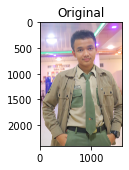

In [43]:
# Read the image
home_img = cv2.imread('foto.jpg')
home_img = cv2.cvtColor(home_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(5, 5))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(home_img)

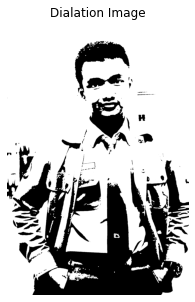

In [44]:
# Convert the image to grayscale
gray = cv2.cvtColor(home_img, cv2.COLOR_BGR2GRAY)

# Apply binary thresholding to obtain a binary image
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# Define the structuring element
kernel = np.ones((5,5), np.uint8)

# Apply dilation to the binary image
dilation = cv2.dilate(binary, kernel, iterations=1)

plt.figure(figsize=(5, 5))
plt.imshow(dilation, cmap='gray')
plt.title('Dialation Image')
plt.axis('off')
plt.show()

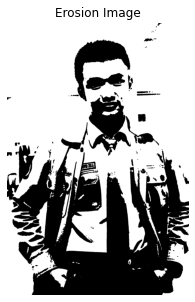

In [45]:
# Apply erosion to the binary image
erosion = cv2.erode(binary, kernel, iterations=1)

plt.figure(figsize=(5, 5))
plt.imshow(erosion, cmap='gray')
plt.title('Erosion Image')
plt.axis('off')
plt.show()

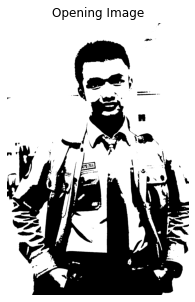

In [46]:
# Apply opening to the binary image
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=(5, 5))
plt.imshow(opening, cmap='gray')
plt.title('Opening Image')
plt.axis('off')
plt.show()

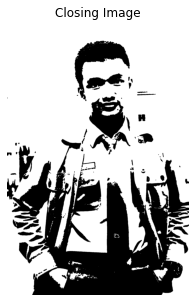

In [47]:
# Apply closing to the binary image
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(5, 5))
plt.imshow(closing, cmap='gray')
plt.title('Closing Image')
plt.axis('off')
plt.show()

Background Subtraction Methods
<br>
<br>Background subtraction (BS) is a common and widely used technique for generating a foreground mask (namely, a binary image containing the pixels belonging to moving objects in the scene) by using static cameras.

<br>As the name suggests, BS calculates the foreground mask performing a subtraction between the current frame and a background model, containing the static part of the scene or, more in general, everything that can be considered as background given the characteristics of the observed scene.

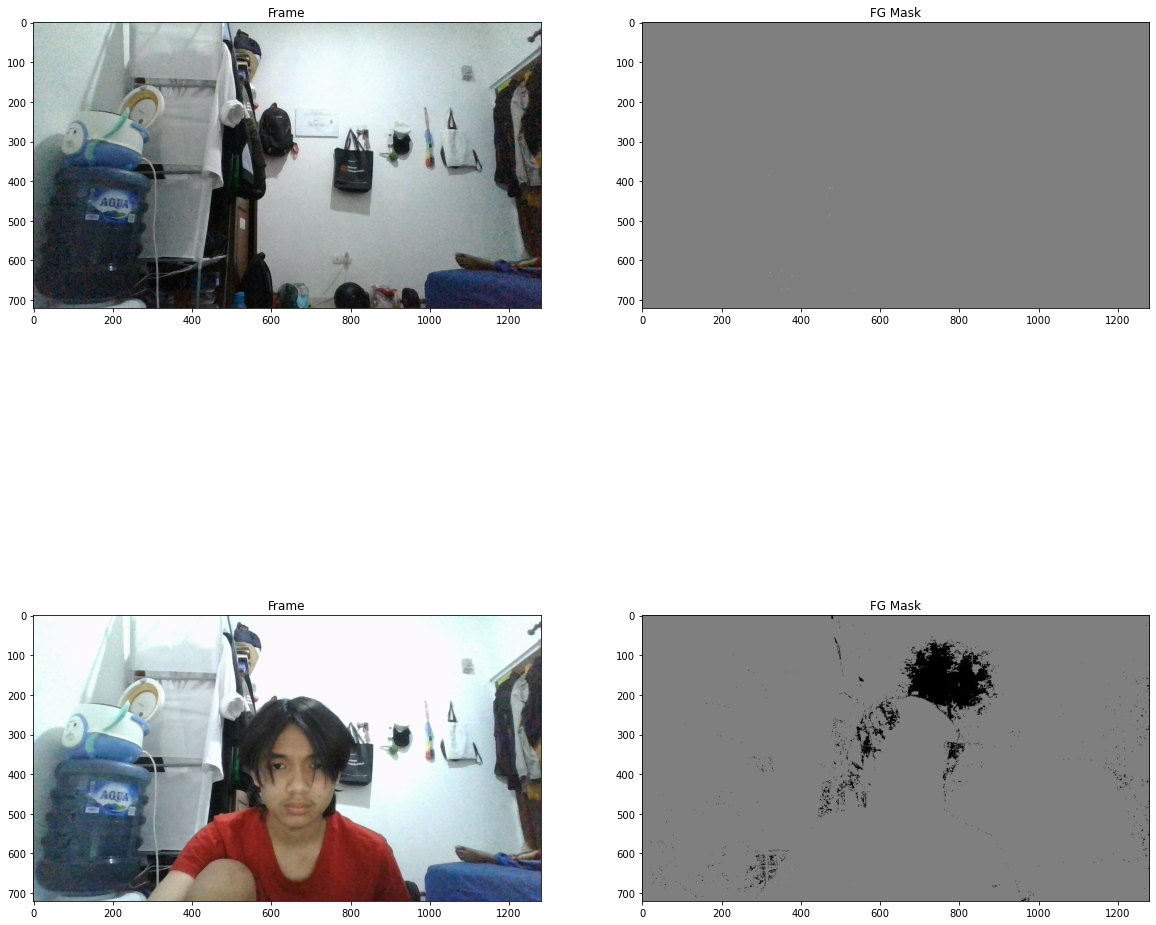

In [49]:
import cv2
import matplotlib.pyplot as plt

algo = 'MOG2'

if algo == 'MOG2':
    backSub = cv2.createBackgroundSubtractorMOG2()
else:
    backSub = cv2.createBackgroundSubtractorKNN()

plt.figure(figsize=(20, 20))

frame = cv2.imread('bg.jpg')
fgMask = backSub.apply(frame)

plt.subplot(2, 2, 1)
plt.title("Frame")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title("FG Mask")
plt.imshow(cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB))

frame = cv2.imread('obj.jpg')
fgMask = backSub.apply(frame)

plt.subplot(2, 2, 3)
plt.title("Frame")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 4)
plt.title("FG Mask")
plt.imshow(cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB))

Face and Eye Detection Haar Cascades

In [ ]:
# Download the test image and utils files
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml \
    -O haarcascade_frontalface_default.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml \
    -O haarcascade_smile.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml \
    -O haarcascade_eye.xml
!wget --no-check-certificate \
    https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py \
    -O common.py

# these imports let you use opencv
import cv2 #opencv itself
import common #some useful opencv functions
import numpy as np # matrix manipulations

#the following are to do with this interactive notebook code
%matplotlib inline
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
import pylab # this allows you to control figure size

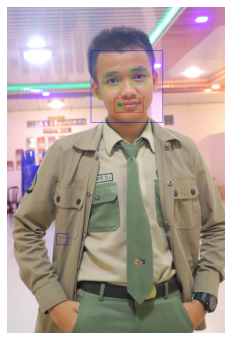

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests

# Fungsi untuk mengunduh file
def download_file(url, filename):
    response = requests.get(url, allow_redirects=True)
    open(filename, 'wb').write(response.content)

# URL dari file yang akan diunduh
files = {
    "haarcascade_frontalface_default.xml": "https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_frontalface_default.xml",
    "haarcascade_smile.xml": "https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_smile.xml",
    "haarcascade_eye.xml": "https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/assets/haarcascade_eye.xml",
    "common.py": "https://raw.githubusercontent.com/computationalcore/introduction-to-opencv/master/utils/common.py"
}

# Mengunduh semua file
for filename, url in files.items():
    download_file(url, filename)

# Import common setelah mengunduhnya
import common  # common.py harus berada di direktori yang sama dengan script ini

# Menampilkan gambar inline dalam notebook
%matplotlib inline

# Mengontrol ukuran gambar yang ditampilkan
import pylab

# Mengatur ukuran gambar yang ditampilkan
pylab.rcParams['figure.figsize'] = (10, 6)

# Memastikan file XML Haar Cascade tersedia
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier('haarcascade_smile.xml')

# Fungsi untuk mendeteksi wajah, mata, dan senyuman
def detect_features(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = img[y:y + h, x:x + w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)

        smiles = smile_cascade.detectMultiScale(roi_gray, 1.8, 20)
        for (sx, sy, sw, sh) in smiles:
            cv2.rectangle(roi_color, (sx, sy), (sx + sw, sy + sh), (0, 0, 255), 2)

    # Konversi gambar ke RGB untuk ditampilkan menggunakan matplotlib
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# Menggunakan fungsi untuk mendeteksi fitur pada gambar
detect_features('foto.jpg')  # Gantilah 'foto.png' dengan jalur gambar Anda


In [ ]:
# Load the messi image and create a greyscale copy of it to be used in the classifiers
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
lena_image1 = cv2.imread('/content/image_data/lena.jpg')
grey = cv2.cvtColor(lena_image1, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(lena_image1, cv2.COLOR_BGR2RGB))